binary Image


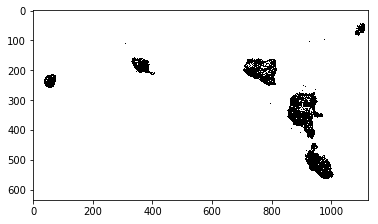

opening Image


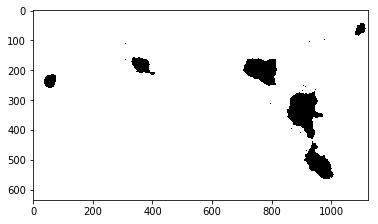

closing Image


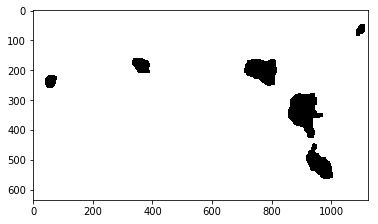

len Contours  7
Area of contour 0  is  6084.0
Area of contour 1  is  10877.5
Area of contour 2  is  1536.5
Area of contour 3  is  7513.5
Area of contour 4  is  2544.0
Area of contour 5  is  1035.5
Total Count:  6
draw contour Image


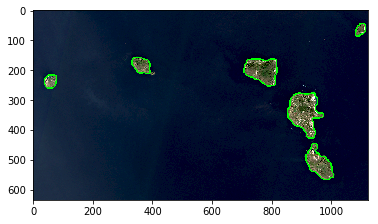

normal Image


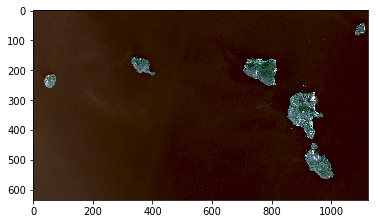

In [37]:
#islands
import cv2
import matplotlib.pyplot as plt
import numpy as np

# read the image
image = cv2.imread('Aeolean_sentinel2.png')
# convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
print("binary Image")
_, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap="gray")
plt.show()
#opening
print("opening Image")
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel) #inside noise
plt.imshow(opening, cmap="gray")
plt.show()
#closing
print("closing Image")
kernel = np.ones((10,10), np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) #inside noise
plt.imshow(closing, cmap="gray")
plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print("len Contours ", len(contours))
# show the image with the drawn contours
#iterate through contours list
count=0
for idx,c in enumerate(contours):
    area = cv2.contourArea(c)
    #print("Area ", area)
    if area > 500 and area < 11000:
        cnt = contours[idx]
        cv2.drawContours(image_rgb, [cnt], 0, (0,255,0), 3)
        print('Area of contour', count, ' is ',area)
        count+=1

print("Total Count: ", count)
print("draw contour Image")
plt.imshow(image_rgb)
plt.show()
print("normal Image")
plt.imshow(image)
plt.show()